<a href="https://colab.research.google.com/github/sora11023539/cctb/blob/main/midterm_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-227d420c5a8c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


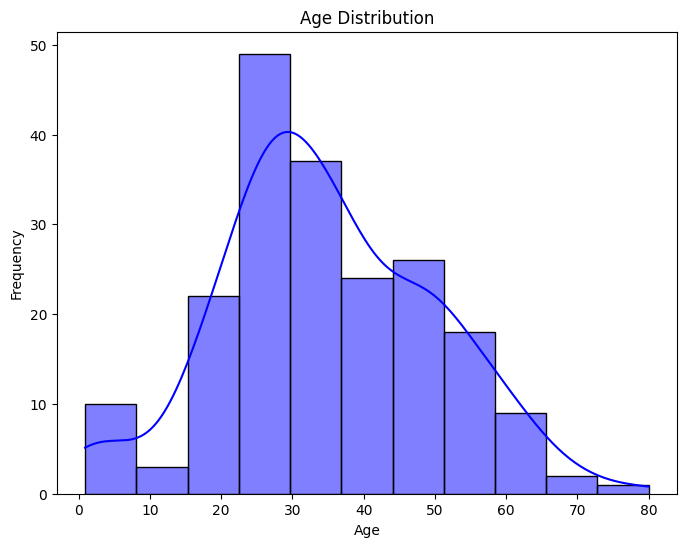

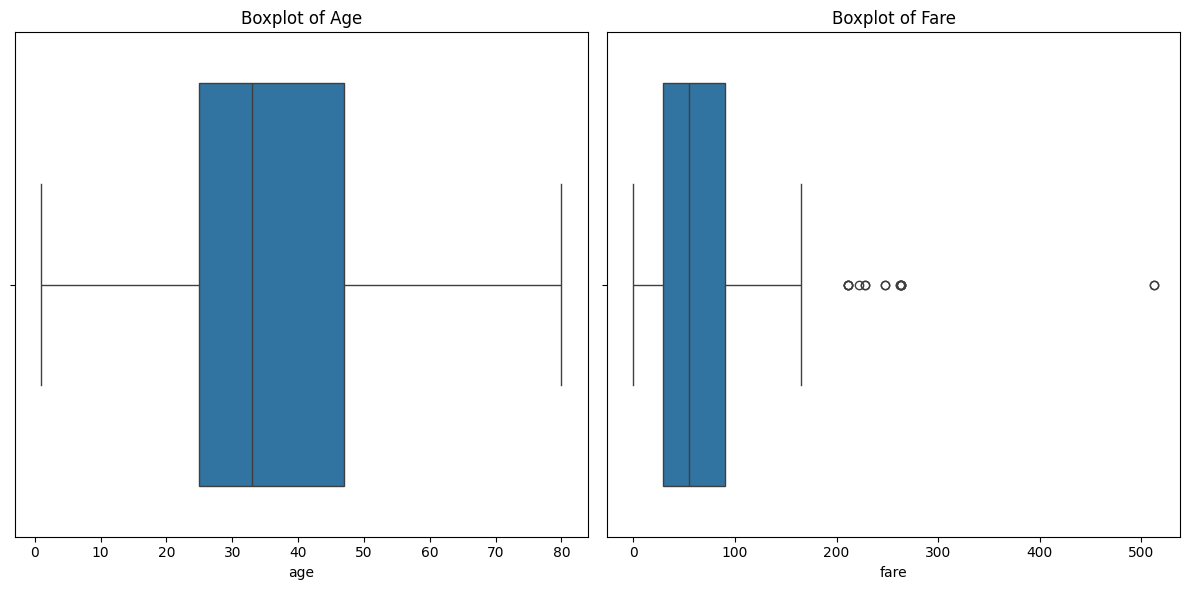

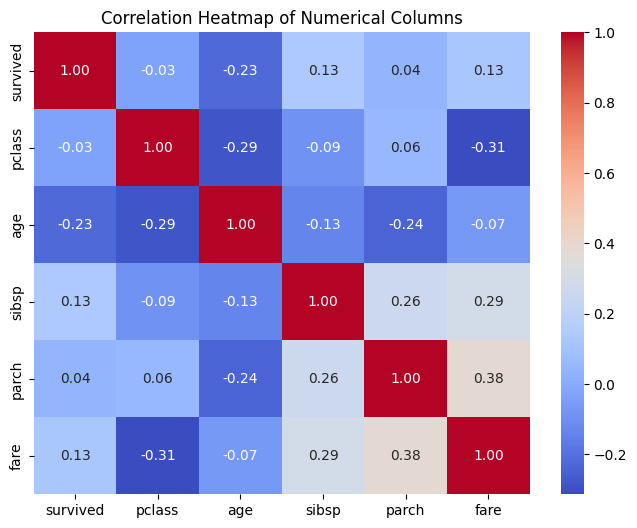

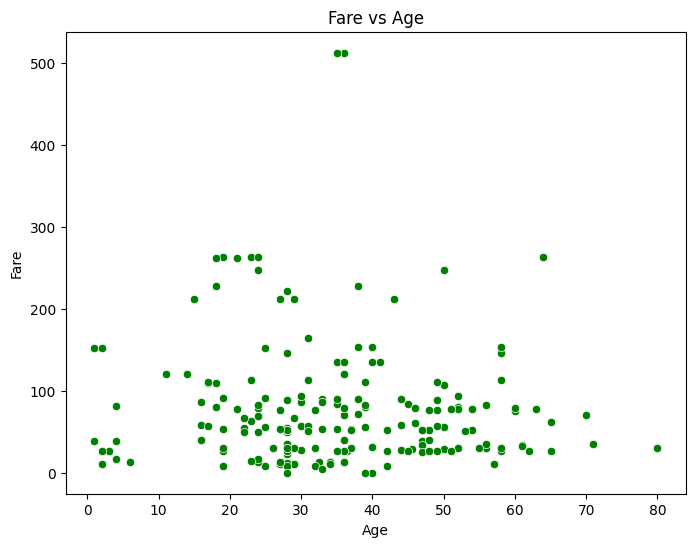

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# 1. Calculate the percentage of missing values in each column
missing_values = titanic.isnull().mean() * 100

# 2. Handle missing values (drop or fill)
# For simplicity, let's fill missing 'age' with the median and drop rows with missing 'embarked' and 'deck'
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.dropna(subset=['embarked', 'deck'], inplace=True)

# 3. Generate summary statistics for numerical and categorical columns
numerical_summary = titanic.describe()
categorical_summary = titanic.describe(include=['object'])

# 4. Plot a histogram for the 'age' column
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 5. Use a boxplot to identify outliers in 'fare' and 'age' columns
plt.figure(figsize=(12, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=titanic['age'])
plt.title('Boxplot of Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic['fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

# 6. Calculate and visualize correlation between numerical columns using a heatmap
numerical_features = titanic.select_dtypes(include=np.number)  # Select numerical columns
numerical_corr = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# 7. Find the average fare for each class and compare across categories
average_fare_by_class = titanic.groupby('pclass')['fare'].mean()

# 8. Create a scatter plot to visualize the relationship between fare and age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=titanic, color='green')
plt.title('Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()
